# 03.2 Data Preprocessing (Lanjutan)

## Outline

* Distance
* Norm
* Dot Products and Projection
* Correlation
* Covariance

## Determining Similarity

Berkaitan dengan proses mengevaluasi sejauh mana dua atau lebih objek, entitas, atau item mirip satu sama lain. Dengan kata lain bagaimana kita mengukur kesamaan atau kedekatan antara dua data point atau vektor.

Ada dua pendekatan umum untuk menentukan kesamaan, yaitu menggunakan konsep ***jarak (distance)*** dan ***dot product***.

1. **Menggunakan Jarak (Distance):**
* Mengukur kesamaan berdasarkan jarak melibatkan perhitungan sejauh mana dua data point atau vektor berjarak satu sama lain dalam ruang. Jarak yang lebih kecil menunjukkan kesamaan yang lebih tinggi.

* Jarak antara dua poin dihitung sebagai jarak garis lurus antara mereka dalam ruang Euclidean. Dalam 2 dimensi, jarak Euclidean antara dua titik $ (u_1, v_1) $ dan $ (u_2, v_2) $ didefinisikan sebagai:$ \text{distance} = \sqrt{(u_2 - u_1)^2 + (v_2 - v_1)^2} $

2. **Menggunakan Dot Product**
* Dot product (atau inner product) antara dua vektor mengukur sejauh mana vektor tersebut sejajar. 
* Jika dua vektor adalah unit vectors (panjangnya 1), dot product akan sama dengan cosine dari sudut antara mereka, yang menjadikannya dasar untuk ***cosine similarity***.
* Dalam aljabar vektor, dot product (atau inner product) antara dua vektor adalah operasi yang menghasilkan satu skalar. Dot product dari dua vektor $ \mathbf{u} $ dan $ \mathbf{v} $ dalam ruang Euclidean didefinisikan sebagai:
$ \mathbf{u} \cdot \mathbf{v} = |\mathbf{u}| |\mathbf{v}| \cos(\theta) $, dimana:
    * $ |\mathbf{u}| $ adalah panjang (atau norma) dari vektor $ \mathbf{u} $.
    * $ |\mathbf{v}| $ adalah panjang (atau norma) dari vektor $ \mathbf{v} $.
    * $ \cos(\theta) $ adalah cosine dari sudut $ \theta $ antara dua vektor.
    
    Dalam bentuk komponen, jika $ \mathbf{u} = [u_1, u_2, ... , u_n] $ dan $ \mathbf{v} = [v_1, v_2, ... , v_n] $, maka dot product didefinisikan sebagai:
    $ \mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + ... + u_n v_n $

***Interpretasi Dot Product***

Dot product memiliki interpretasi geometris yang penting. Nilai dot product mengukur sejauh mana satu vektor berada "sejajar" dengan vektor lainnya. Ini adalah alasan mengapa dot product sering dikaitkan dengan istilah "measures how much one vector is 'along' another":

* Jika dot product **positif**, berarti dua vektor memiliki arah yang sama atau sejajar.
* Jika dot product **nol**, berarti dua vektor ortogonal atau tegak lurus satu sama lain.
* Jika dot product **negatif**, berarti dua vektor memiliki arah yang berlawanan.

Dengan kata lain, dot product mengukur komponen dari satu vektor yang berada dalam arah vektor lain. Ini sangat berguna dalam berbagai aplikasi, termasuk proyeksi vektor, menentukan kesamaan antara vektor (seperti cosine similarity), dan lain-lain.

***Contoh***

Dalam aljabar vektor, dot product adalah operasi yang menghasilkan satu skalar dari dua vektor. Misalkan kita memiliki dua vektor sebagai berikut:

$ \mathbf{u} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} $
$ \mathbf{v} = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} $

Dot product dari vektor $ \mathbf{u} $ dan $ \mathbf{v} $ dapat dihitung dengan mengalikan setiap komponen vektor satu sama lain dan kemudian menjumlahkan hasilnya:

$ \mathbf{u} \cdot \mathbf{v} = 1 \times 4 + 2 \times 5 + 3 \times 6 $

$ \mathbf{u} \cdot \mathbf{v} = 4 + 10 + 18 $

$ \mathbf{u} \cdot \mathbf{v} = 32 $

Sehingga, dot product dari vektor $ \mathbf{u} $ dan $ \mathbf{v} $ adalah 32.


In [2]:
def dot_product(u, v):
    return sum([ui * vi for ui, vi in zip(u, v)])

# Definisikan vektor
u = [1, 2, 3]
v = [4, 5, 6]

# Hitung dot product
result = dot_product(u, v)
print(f"Dot product dari {u} dan {v} adalah: {result}")


Dot product dari [1, 2, 3] dan [4, 5, 6] adalah: 32


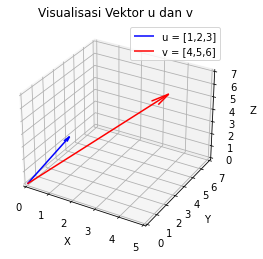

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vektor u dan v
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Plot vektor u (biru)
ax.quiver(0, 0, 0, u[0], u[1], u[2], color='b', arrow_length_ratio=0.1, label='u = [1,2,3]')
# Plot vektor v (merah)
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='r', arrow_length_ratio=0.1, label='v = [4,5,6]')

ax.set_xlim([0, 5])
ax.set_ylim([0, 7])
ax.set_zlim([0, 7])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title("Visualisasi Vektor u dan v")

plt.show()


**Relasi antara Distance dan Dot Product**

***Dot Product***
Diberikan dua vektor $ \mathbf{u} $ dan $ \mathbf{v} $, produk titik dihitung sebagai:

$$ \mathbf{u} \cdot \mathbf{v} = |\mathbf{u}| |\mathbf{v}| \cos(\theta) $$

di mana $ \theta $ adalah sudut antara kedua vektor.

***Distance***
Diberikan dua titik yang direpresentasikan oleh vektor $ \mathbf{u} $ dan $ \mathbf{v} $, jarak Euklidian dihitung sebagai:

$$ ||\mathbf{u} - \mathbf{v}|| $$

***Relasi melalui Norma atau Panjang Vektor***
Dari definisi produk titik, kita dapat menyatakan panjang atau norma dari vektor sebagai:

$$ |\mathbf{u}| = \sqrt{\mathbf{u} \cdot \mathbf{u}} $$

***Relasi melalui Sudut antara Vektor***
Dengan mengisolasi $ \cos(\theta) $ dari definisi produk titik:

$$ \cos(\theta) = \frac{\mathbf{u} \cdot \mathbf{v}}{|\mathbf{u}| |\mathbf{v}|} $$

Ketika $ \theta = 90^{\circ} $ (vektor ortogonal), $ \cos(\theta) = 0 $ sehingga $ \mathbf{u} \cdot \mathbf{v} = 0 $.

***Relasi melalui Jarak Euklidian***
Diberikan dua vektor $ \mathbf{u} $ dan $ \mathbf{v} $, jarak Euklidian antara mereka adalah norm dari selisih keduanya:

$$ ||\mathbf{u} - \mathbf{v}|| = \sqrt{(\mathbf{u} - \mathbf{v}) \cdot (\mathbf{u} - \mathbf{v})} $$

***Ringkasan***
- Dot product memberi kita informasi tentang sejauh mana satu vektor berada di arah vektor lain (melalui $ \cos(\theta) $).
- Jarak Euklidian memberi kita ukuran "seberapa jauh" satu vektor dari vektor lain.
- Dengan menggunakan dot product, kita dapat mengekstrak informasi seperti panjang vektor dan sudut antara vektor, yang selanjutnya dapat digunakan untuk memahami jarak atau kedekatan antara vektor-vektor tersebut.

***Contoh  Dot Product dan Jarak Euklidian***

Diberikan vektor:

$ \mathbf{u} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} $

$ \mathbf{v} = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} $

Dot product $ \mathbf{u} $ dan $ \mathbf{v} $ dihitung sebagai:

$ \mathbf{u} \cdot \mathbf{v} = 1 \times 4 + 2 \times 5 + 3 \times 6 $

$ \mathbf{u} \cdot \mathbf{v} = 4 + 10 + 18 = 32 $

Sehingga, dot product dari vektor $ \mathbf{u} $ dan $ \mathbf{v} $ adalah 32.

Sedangkan jarak Euklidian antara vektor $ \mathbf{u} $ dan $ \mathbf{v} $ dihitung sebagai:

$ ||\mathbf{u} - \mathbf{v}|| = \sqrt{(1 - 4)^2 + (2 - 5)^2 + (3 - 6)^2} $

$ ||\mathbf{u} - \mathbf{v}|| = \sqrt{9 + 9 + 9} = \sqrt{27} $

Sehingga, jarak Euklidian antara $ \mathbf{u} $ dan $ \mathbf{v} $ adalah $ \sqrt{27} $.


In [4]:
import numpy as np

# Mendefinisikan vektor u dan v
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Menghitung dot product
dot_product = np.dot(u, v)

# Menghitung jarak Euklidian
euclidean_distance = np.linalg.norm(u - v)

print(f"Dot Product of u and v: {dot_product}")
print(f"Euclidean Distance between u and v: {euclidean_distance}")


Dot Product of u and v: 32
Euclidean Distance between u and v: 5.196152422706632


## Dot Product dan Projections

Dalam konteks geometri vektor, proyeksi satu vektor pada vektor lainnya mengacu pada "bayangan" vektor tersebut yang dibuat pada vektor lain ketika ditarik garis tegak lurus. Jika kita memiliki vektor $ \mathbf{x} $ dan ingin memproyeksikannya pada vektor $ \mathbf{w} $, komponen proyeksi $ \mathbf{x} $ dalam arah $ \mathbf{w} $ diberikan oleh:

$ \text{proj}_{\mathbf{w}}(\mathbf{x}) = \frac{\mathbf{x} \cdot \mathbf{w}}{\mathbf{w} \cdot \mathbf{w}} \mathbf{w} $

Di sini, $ \frac{\mathbf{x} \cdot \mathbf{w}}{\mathbf{w} \cdot \mathbf{w}} $ adalah skalar yang mengukur seberapa jauh vektor $ \mathbf{x} $ berada di arah $ \mathbf{w} $.

Misalkan kita memiliki formula $ z = \mathbf{w}^T \mathbf{x} $, di mana $ \mathbf{w}^T $ adalah transpose dari vektor $ \mathbf{w} $. Formula ini pada dasarnya adalah produk titik antara $ \mathbf{w} $ dan $ \mathbf{x} $. Ini mengukur sejauh mana vektor $ \mathbf{x} $ berada di arah $ \mathbf{w} $.

Misalkan $ \mathbf{w} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} $ (vektor unit pada sumbu-x) dan $ \mathbf{x} = \begin{bmatrix} 3 \\ 2 \end{bmatrix} $. Maka, proyeksi $ \mathbf{x} $ pada $ \mathbf{w} $ adalah:

$$ \text{proj}_{\mathbf{w}}(\mathbf{x}) = \frac{\begin{bmatrix} 3 \\ 2 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix}}{\begin{bmatrix} 1 \\ 0 \end{bmatrix} \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix}} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = 3 \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 3 \\ 0 \end{bmatrix} $$

Ini berarti bahwa ketika kita memproyeksikan $ \mathbf{x} $ ke arah $ \mathbf{w} $, kita mendapatkan vektor yang berada 3 unit di arah sumbu-x.

Secara visual, Anda dapat membayangkan vektor $ \mathbf{x} $ di ruang 2D. Ketika Anda memproyeksikannya ke arah sumbu-x (yaitu, arah $ \mathbf{w} $), "bayangan" vektor tersebut pada sumbu-x memiliki panjang 3 unit.


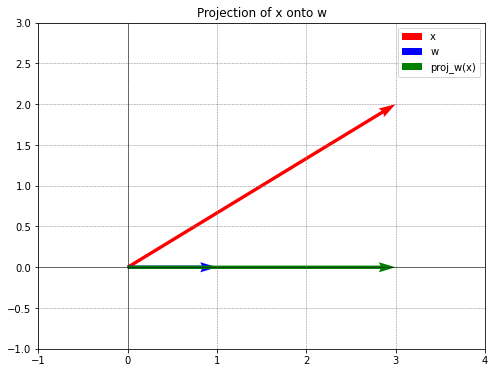

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define vectors
x = np.array([3, 2])
w = np.array([1, 0])

# Dot product
dot_product = np.dot(x, w)

# Projection of x onto w
projection_scalar = dot_product / np.dot(w, w)
projection = projection_scalar * w

# Visualization
plt.figure(figsize=(8,6))
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='r', label='x')
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='b', label='w')
plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color='g', linestyle='dashed', label='proj_w(x)')

# Setting plot limits
plt.xlim(-1, 4)
plt.ylim(-1, 3)
plt.axvline(x=0, color='black',linewidth=0.5)
plt.axhline(y=0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title("Projection of x onto w")
plt.legend()
plt.show()


Kode di atas mendefinisikan vektor $ \mathbf{x} $ dan $ \mathbf{w} $, menghitung dot produk dan proyeksi, serta menampilkan visualisasinya. Vektor $ \mathbf{x} $ ditampilkan dalam warna merah, vektor $ \mathbf{w} $ dalam biru, dan proyeksi dari x ke w dalam garis putus-putus hijau.

## Data Dimensionality Reduction

Dimensionality reduction adalah teknik yang digunakan dalam pemrosesan data dan statistik, sering kali dalam konteks pembelajaran mesin, untuk mengurangi jumlah fitur (dimensi) yang digunakan dalam analisis, tanpa kehilangan informasi yang penting. Alasan untuk melakukan hal ini antara lain:

- **Kurangnya data**: Dalam banyak kasus, semakin banyak dimensi yang Anda miliki, semakin banyak data yang Anda butuhkan.
- **Penghitungan yang mahal**: Dengan semakin banyaknya fitur, kompleksitas komputasi dapat meningkat secara eksponensial.
- **Multikolinearitas**: Fitur yang sangat berkorelasi dapat menyebabkan masalah di beberapa model.
- **Visualisasi**: Sulit untuk memvisualisasikan data dengan lebih dari tiga dimensi.

Ada beberapa pendekatan untuk mengurangi dimensi data:

1. **Pemilihan Fitur**: Ini melibatkan pemilihan subset fitur yang paling relevan. Tekniknya termasuk analisis korelasi, uji statistik, atau metode berbasis pohon seperti Random Forest.

2. **Penggabungan Fitur**: Dalam pendekatan ini, fitur yang ada dikombinasikan untuk membuat fitur-fitur baru yang lebih bermakna. Teknik penggabungan fitur melibatkan metode seperti analisis komponen utama (PCA) dan analisis faktor.

3. **Drop Feature**: Dalam beberapa kasus, menghapus fitur mungkin masuk akal jika fitur tersebut tidak menambahkan informasi yang bermakna atau jika informasi yang mereka tambahkan dapat ditangkap oleh fitur lain.

Ketika kita membicarakan reduksi dimensi, khususnya dengan metode seperti PCA, kita sebenarnya sedang memproyeksikan data kita ke sumbu kanonik. Sumbu-sumbu ini dipilih sedemikian rupa sehingga mereka menangkap variasi maksimum dari data asli. Dengan kata lain, kita mengubah basis vektor dari data kita ke basis yang baru di mana sumbu-sumbu tersebut sejajar dengan arah variasi maksimum dalam data kita.

Salah satu konsekuensi dari reduksi dimensi adalah kehilangan informasi. Dalam konteks PCA, ini sering diukur dalam istilah variasi yang hilang. Setelah memproyeksikan data ke dimensi yang lebih rendah, variasi yang hilang adalah variasi yang tidak dapat dijelaskan oleh komponen utama yang kita tetapkan. Ini adalah trade-off yang harus kita pertimbangkan: mengurangi dimensi dapat membuat analisis lebih mudah dan efisien, tetapi kita mungkin kehilangan beberapa informasi dalam prosesnya.


## Reduksi Dimensi Melalui Proyeksi

#### Proyeksi Untuk Reduksi Dimensi

Menggunakan proyeksi untuk reduksi dimensi adalah konsep dasar dalam banyak teknik, terutama Analisis Komponen Utama (PCA). Inti dari pendekatan ini adalah mengubah data berdimensi tinggi ke ruang dimensi yang lebih rendah dengan "memproyeksikan" data pada sumbu-sumbu tertentu.

#### Kehilangan Informasi Saat Proyeksi

Saat kita memproyeksikan data ke dimensi yang lebih rendah, kita kehilangan informasi. Bayangkan Anda memiliki titik-titik data dalam tiga dimensi dan Anda memproyeksikannya ke dalam bidang dua dimensi. Semua titik yang sebelumnya memiliki koordinat berbeda dalam dimensi ketiga akan memiliki koordinat yang sama setelah proyeksi.

#### Mengurangi Kehilangan Informasi

Kehilangan informasi adalah konsekuensi yang tidak diinginkan dari proyeksi. Tujuan kita adalah meminimalkan kehilangan informasi ini. Bagaimana caranya?

Solusi: Temukan dan proyeksikan sepanjang arah di mana kehilangan informasi paling minimal. Secara khusus, kita ingin menemukan arah di mana sebagian besar variasi (variance) data dijelaskan. Dalam konteks PCA, ini disebut komponen utama pertama.

#### Bagaimana Melakukannya?

1. **Hitung Matriks Kovariansi**: Matriks ini akan memberi tahu kita bagaimana fitur-fitur berinteraksi satu sama lain. 

2. **Hitung Nilai dan Vektor Eigen**: Nilai eigen dari matriks kovariansi memberikan ukuran dari "variasi" yang dijelaskan oleh masing-masing arah, sedangkan vektor eigen memberi kita arah tersebut.

3. **Urutkan Vektor Eigen Berdasarkan Nilai Eigen**: Vektor eigen dengan nilai eigen terbesar adalah arah di mana variasi paling banyak terjadi. Ini adalah komponen utama pertama.

4. **Proyeksikan Data**: Gunakan vektor eigen yang sesuai dengan nilai eigen tertinggi untuk memproyeksikan data Anda ke dimensi yang lebih rendah.

Melalui pendekatan ini, kita dapat mengurangi dimensi data kita sambil meminimalkan kehilangan informasi.


#### Contoh Analisis Komponen Utama (PCA)

Kita memiliki data sebagai berikut:

$ X = [2, 3, 3, 4, 5] $
$ Y = [3, 3, 4, 4, 5] $

#### Langkah 1: Pusatkan Data

Pertama-tama, kita perlu menghitung rata-rata dari setiap fitur:

$ \bar{X} = \frac{2 + 3 + 3 + 4 + 5}{5} = 3.4 $
$ \bar{Y} = \frac{3 + 3 + 4 + 4 + 5}{5} = 3.8 $

Kemudian, pusatkan data dengan mengurangkan setiap titik data dengan rata-rata:

$ X_{centered} = [-1.4, -0.4, -0.4, 0.6, 1.6] $
$ Y_{centered} = [-0.8, -0.8, 0.2, 0.2, 1.2] $

#### Langkah 2: Hitung Matriks Kovariansi

Matriks kovariansi dari data:

$ C = \begin{bmatrix}
    Var(X) & Cov(X,Y) \\
    Cov(Y,X) & Var(Y)
\end{bmatrix} $

Di mana:

$ Var(X) = \frac{\Sigma (X_i - \bar{X})^2}{n} $

$ Var(Y) = \frac{\Sigma (Y_i - \bar{Y})^2}{n} $

$ Cov(X,Y) = \frac{\Sigma (X_i - \bar{X})(Y_i - \bar{Y})}{n} $

Setelah menghitung, kita mendapatkan:

$ C = \begin{bmatrix}
    1.04 & 0.8 \\
    0.8 & 0.56
\end{bmatrix} $

#### Langkah 3: Hitung Nilai dan Vektor Eigen

Dengan bantuan pustaka python, kita dapat menghitung nilai dan vektor eigen dari matriks kovariansi.

#### Langkah 4: Urutkan Vektor Eigen

Urutkan vektor eigen berdasarkan besar kecilnya nilai eigen. Vektor eigen dengan nilai eigen tertinggi akan menjadi komponen utama pertama.

#### Langkah 5: Proyeksikan Data

Gunakan vektor eigen yang sesuai dengan nilai eigen tertinggi untuk memproyeksikan data Anda ke dimensi yang lebih rendah.


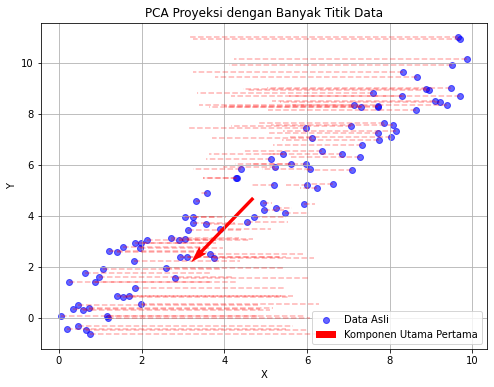

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat data acak dengan korelasi
np.random.seed(42)  # untuk hasil yang konsisten
N = 100
X = np.random.rand(N) * 10
Y = X + (np.random.rand(N) * 3 - 1.5)  # Y berkorelasi dengan X namun ada variasi acak

# Langkah 1: Pusatkan Data
X_mean = np.mean(X)
Y_mean = np.mean(Y)

X_centered = X - X_mean
Y_centered = Y - Y_mean

# Langkah 2: Hitung Matriks Kovariansi
data_centered = np.vstack((X_centered, Y_centered)).T
cov_matrix = np.cov(data_centered, rowvar=False)

# Langkah 3: Hitung Nilai dan Vektor Eigen
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Langkah 4: Urutkan Vektor Eigen
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_vectors_sorted = eigen_vectors[:, sorted_indices]

# Langkah 5: Proyeksikan Data
first_principal_component = eigen_vectors_sorted[:, 0]

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color='blue', alpha=0.6, label='Data Asli')
plt.quiver(X_mean, Y_mean, first_principal_component[0], first_principal_component[1], scale=5, color='red', label='Komponen Utama Pertama')

# Proyeksi titik-titik ke arah komponen utama pertama
for i in range(len(X)):
    x_proj = X[i] - (Y[i]-Y_mean)*first_principal_component[1]/first_principal_component[0]
    y_proj = Y[i]
    plt.plot([X[i], x_proj], [Y[i], y_proj], 'r--', alpha=0.3)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('PCA Proyeksi dengan Banyak Titik Data')
plt.grid(True)
plt.legend()
plt.show()


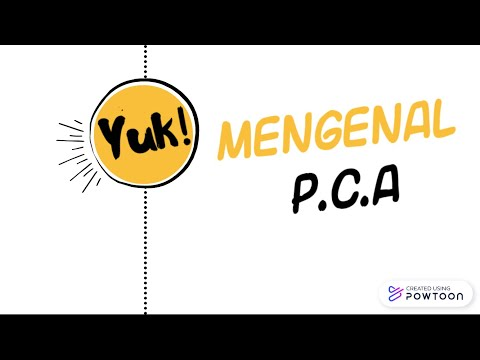

In [11]:
from IPython.display import YouTubeVideo

YouTubeVideo('3ySy-OLjPc0', width=700, height=400)

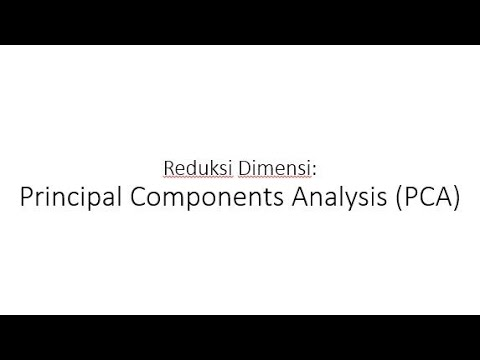

In [12]:
YouTubeVideo('0HZImKqPMjA', width=700, height=400)